<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Intro_to_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('sales', axis=1)
y = df["sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

##sklearn - LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
#we can't plot this because we are using 3 independent variables.
#so we need to use model evaluation

##Model Evaluation

**Evaluation of regression models**

most common evaluation matrics:
* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)




mae.svg

[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)



mse.svg

[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

rmse.svg

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred, y_test)

1.3475432951281092

In [ ]:
np.sqrt(mean_squared_error(y_pred, y_test))
##if this result is bad but MAE is ok,
##that might mean that most gusses are ok but som are way off.

1.6368074860365935

##Residual Plots

this will help us decide if Linear regression is the correct type of model to choose for our problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(0,50)

##Examples for non-linear functions

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [ ]:


def create_non_linear_datasets(x, f_type="para"):
  if f_type == "para":
    shift_val = - (len(x) // 2)
    shifted_arr = x - x[shift_val]
    return -shifted_arr**2

  elif f_type == "outlies":
    slope = np.random.rand() * 10 - 5  # Random slope between -5 and 5
    intercept = np.random.rand() * 10 - 5  # Random intercept between -5 and 5
    y = slope * x + intercept

    # Introduce outliers
    num_outliers = int(0.1 * len(x))  # 1% of the data
    outlier_indices = np.random.choice(len(x), num_outliers, replace=False)
    y[outlier_indices] = y[outlier_indices] + (np.random.rand(num_outliers) * 10 - 10)  # Random shift between -10 and 10

    return y
  elif f_type == "classification":
    classes = [np.random.randint(np.min(x),np.max(x)) for _ in [1,2]]
    return [np.random.choice(classes) for _ in x]


  else:
    return (x*2) + (np.random.rand(len(x)) * 10 - 10)


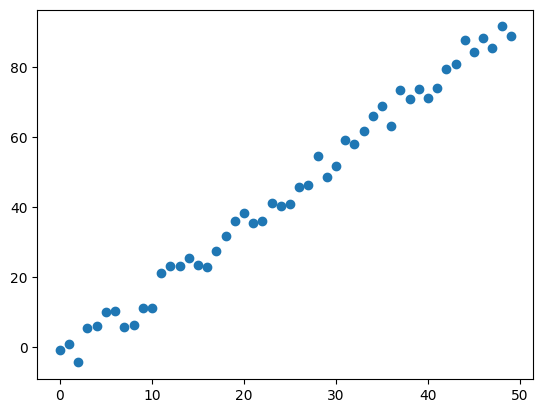

In [ ]:
plt.scatter(x, create_non_linear_datasets(x, ""))

##trying to solve non-linear problems with linear regression.

<Axes: xlabel='X', ylabel='y'>

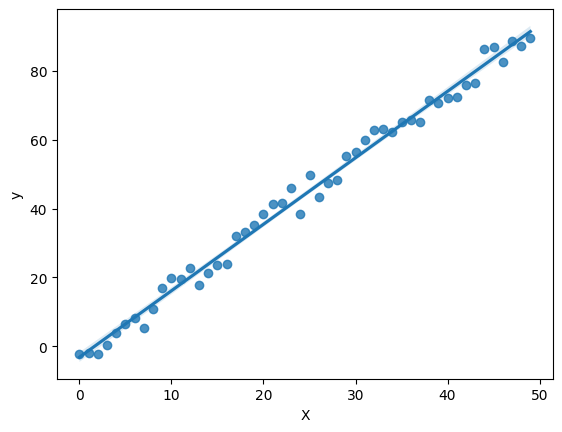

In [ ]:
df = pd.DataFrame()
df["X"] = np.arange(0,50)
df["y"] = create_non_linear_datasets(x, "")


sns.regplot(data=df, x='X', y='y' )

##Residual Plots

In [ ]:
b1, b0 = np.polyfit(x=df["X"], y=df["y"], deg=1)

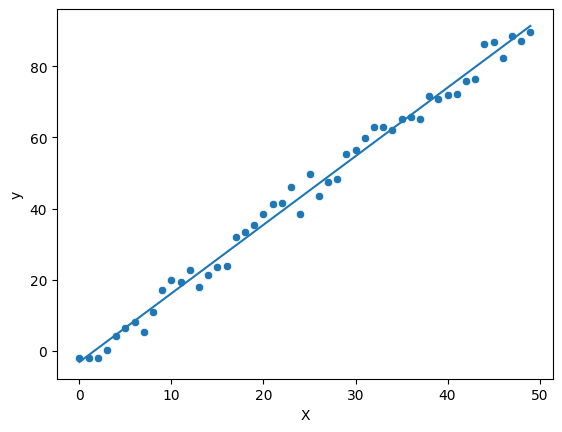

In [ ]:
y_pred = b0 + b1 * X
sns.scatterplot(data=df, x='X', y='y')
plt.plot(X, y_pred)

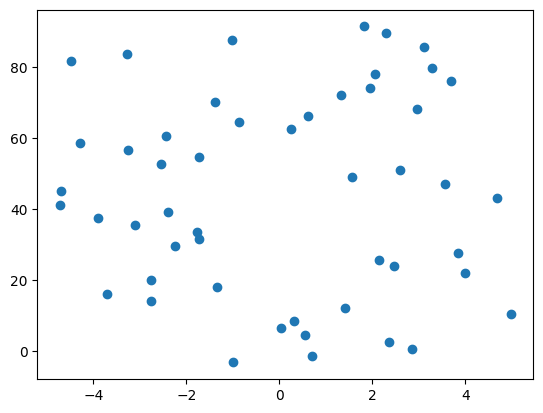

In [ ]:
#Calculate Residuals
residuals = y_pred - df["y"]
plt.scatter(residuals, y_pred)

##Model Persistence

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('Advertising.csv')

X = df.drop('sales', axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.04458793,  0.2013746 , -0.00487706])

###Save the Model as a joblib file

In [ ]:
from joblib import dump, load

dump(model, "myModel.joblib")

['myModel.joblib']

###Load A Joblib File

In [ ]:
reloaded_model = load('myModel.joblib')

In [ ]:
reloaded_model.predict(X_test)

In [ ]:
reloaded_model.predict([[23,12,43]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.11619673])